## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')

pd.options.mode.chained_assignment = None

King County House Sales dataset.<br>

**id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
df.shape

(21597, 21)

According to the info() method the dataset contains 21597 rows and 21 columns.  The below also provides that the majority of the data types are int or floats.  There are also 3 objects.  In addition, 3 columns (waterfront, view,yr_renovated) contain null values.<br>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


The describe() method enables us to get a quick statistical overview of the dataset.<br>
There's lots of variations in the mean and standard deviations in the variables which means that normalization and standardization will need to be addressed.<br>
<br>
Standardization or z-score is one method will need to be applied to the data because variables such as sqft_living with a mean of 15099.409 and 41412.637, respectively, will have greater weight when performing a model over a variable such as floors with a mean of 1.494 and a standard deviation of 0.540.  The effect is that all variabels, except target, will all a mean of around 0 and standard deviaiton of around 1.<br>  

In [7]:
df.describe().round(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.00,21597.000
mean,4.580474e+09,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.62,12758.284
std,2.876736e+09,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.23,27274.442
min,1.000102e+06,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.00,651.000
25%,2.123049e+09,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.00,5100.000
50%,3.904930e+09,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.00,7620.000
75%,7.308900e+09,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.00,10083.000
max,9.900000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.00,871200.000


### Null Values
Columns: waterfront, view and yr_renovated have NaN values there need to be addressed either by replacing them 
with another known value or deleting them.  We can't input variables into our model that have null values without getting an error message.<br>

In [8]:
df.columns
df_cols = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [9]:
df_housing = df[df_cols]

In [10]:
df_housing.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [11]:
df_housing.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
#do any rows have duplicate data.
duplicates = df_housing[df_housing.duplicated()]
print(len(duplicates))

0


In [13]:
water_na = df_housing['waterfront'].isnull().sum()
water_na_percent = df_housing['waterfront'].isnull().sum() * 100/len(df_housing['waterfront'])
yr_ren_na = df_housing['yr_renovated'].isnull().sum()
yr_ren_percent = df_housing['yr_renovated'].isnull().sum() * 100/len(df_housing['yr_renovated'])
view_na = df_housing['view'].isnull().sum() 
view_na_percent = df_housing['view'].isnull().sum()* 100/len(df_housing['view'])
print("Column 'waterfront' has {} missing value which constitute {} % of the column".format(water_na,water_na_percent.round(3)))
print("Column 'yr_renovated' has {} missing value which constitute {} % of the column".format(yr_ren_na,yr_ren_percent.round(3)))
print("Column 'view' has {} missing value which constitute {} % of the column".format(view_na,view_na_percent.round(3)))

Column 'waterfront' has 2376 missing value which constitute 11.002 % of the column
Column 'yr_renovated' has 3842 missing value which constitute 17.79 % of the column
Column 'view' has 63 missing value which constitute 0.292 % of the column


In [14]:
df_housing.isnull().sum() * 100/ len(df_housing)

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

The column 'waterfront' indciates whether or not a house has a view to a waterfront.  The column has 2376 NaN values which makes up 11% of the variable.  The values are either 0 or 1 for having a waterfront view or not, respectively.  I decided to replace the null values with the value 0 which constitutes approximately 88% of the values in the variable.<br>

In [15]:
#waterfront - House which has a view to a waterfront
print(df_housing['waterfront'].value_counts(dropna=False) )
print('---------')
print(df_housing['waterfront'].value_counts(dropna=False) * 100 / len(df_housing['waterfront']))

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64
---------
0.0    88.322452
NaN    11.001528
1.0     0.676020
Name: waterfront, dtype: float64


In [16]:
df_housing['waterfront'].unique()

array([nan,  0.,  1.])

In [17]:
print(df_housing.shape)
print(df_housing['waterfront'].isnull().sum())

(21597, 21)
2376


In [18]:
try:
    fill_col = ['waterfront']
    df_housing['waterfront'].fillna(value=df_housing['waterfront'].mode()[0], inplace=True)
except:
    print("'waterfront' not in the dataframe.")        

In [19]:
df_housing['waterfront'].isnull().sum()

0

In [20]:
# total rows: 21,597 
df_housing['waterfront'].value_counts(dropna=False)

0.0    21451
1.0      146
Name: waterfront, dtype: int64

The column 'yr_renovated' refers to year property was renovated or 0 if there was no renovation.  The column has 3842 null values which constitute around 18% of the data in the column.  Around 78% of the 
values in the column are 0.0 which means that 78% of homes weren't renovated.  I will replace null values with values 0.0 since that constitutes the majority of values.<br>

In [21]:
#it looks like the majority of homes weren't renovated or 78% of variable
print(df_housing['yr_renovated'].value_counts(dropna=False))
print('---------------')
print(df_housing['yr_renovated'].value_counts(dropna=False) *100 / len(df_housing['yr_renovated']))

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Length: 71, dtype: int64
---------------
0.0       78.765569
NaN       17.789508
2014.0     0.338010
2003.0     0.143538
2013.0     0.143538
            ...    
1944.0     0.004630
1948.0     0.004630
1976.0     0.004630
1934.0     0.004630
1953.0     0.004630
Name: yr_renovated, Length: 71, dtype: float64


In [22]:
try:
    #fill_col = ['yr_renovated']
    df_housing['yr_renovated'].fillna(value=df_housing['yr_renovated'].mode()[0.0], inplace=True)
except:
    print("'waterfront' not in the dataframe.")  

In [23]:
df_housing['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [24]:
df_housing['yr_renovated'].value_counts() 

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [25]:
df_housing['yr_renovated'].isnull().sum()

0

The column 'view' has NaN values, but they only make up less than 1% (0.291707) of independent variable, so I decided to drop them.<br>

In [26]:
print(df_housing['view'].value_counts(dropna=False))
print('-----------------')
print(df_housing['view'].value_counts(dropna=False)* 100/ len(df_housing['view']))

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
NaN       63
Name: view, dtype: int64
-----------------
0.0    89.929157
2.0     4.431171
3.0     2.352179
1.0     1.527990
4.0     1.467796
NaN     0.291707
Name: view, dtype: float64


In [27]:
    try:
        df_housing = df_housing.dropna(subset=['view'])
    except:
        print('not in the dataframe.')        

In [28]:
df_housing['view'].isnull().sum()

0

In [29]:
df_housing.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Convert Object Datatypes
The columns date and sqft_basement are considered objects and need to be numeric datatypes so the statsmodel will take them as inputs.<br>
The date column is also an object it will be converted in part into new new column and dropped.<br> 

In [30]:
numeric_data = df_housing.select_dtypes(include=[np.number])
cat_data = df_housing.select_dtypes(exclude=[np.number])
print ("There are {} numeric columns and {} object columns in the housing data set".format(numeric_data.shape[1],cat_data.shape[1]))

There are 19 numeric columns and 2 object columns in the housing data set


In [31]:
df_housing.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [32]:
df_housing.loc[:, df_housing.dtypes == object]

,date,sqft_basement
0,10/13/2014,0.0
1,12/9/2014,400.0
2,2/25/2015,0.0
3,12/9/2014,910.0
4,2/18/2015,0.0
...,...,...
21592,5/21/2014,0.0
21593,2/23/2015,0.0
21594,6/23/2014,0.0
21595,1/16/2015,0.0


The column 'sqft_basement' is not only an object but it has several values of '?', which won't show up as null but they should be treated similar to null values.<br>
Th largest value is 0.0 which is 59% of variable means that the property doesn't have a basement.  The '?' only makes up 2% of values so I will replace those with the largest value which is 0.<br>

In [33]:
#sqft_basement - square footage of the basement
df_housing['sqft_basement'].value_counts()

0.0       12798
?           452
600.0       216
500.0       209
700.0       207
          ...  
588.0         1
2720.0        1
1525.0        1
2240.0        1
556.0         1
Name: sqft_basement, Length: 302, dtype: int64

In [34]:
df_housing['sqft_basement'].value_counts() *100 / len(df_housing['sqft_basement'])

0.0       59.431597
?          2.099006
600.0      1.003065
500.0      0.970558
700.0      0.961271
            ...    
588.0      0.004644
2720.0     0.004644
1525.0     0.004644
2240.0     0.004644
556.0      0.004644
Name: sqft_basement, Length: 302, dtype: float64

In [35]:
try:
    df_housing["sqft_basement"] = df_housing["sqft_basement"].replace('?', '0.0')
except:
    print('Already replaced in the dataframe.')  

In [36]:
df_housing['sqft_basement'].value_counts()

0.0       13250
600.0       216
500.0       209
700.0       207
800.0       201
          ...  
243.0         1
588.0         1
2720.0        1
1525.0        1
556.0         1
Name: sqft_basement, Length: 301, dtype: int64

In [37]:
df_housing['sqft_basement'].dtype

dtype('O')

In [38]:
try: 
    df_housing['sqft_basement'] = df_housing['sqft_basement'].astype('float64')
except:
    print('Already a float')

In [39]:
df_housing['sqft_basement'].dtype

dtype('float64')

In [40]:
df_housing.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Convert date
Column 'date' is an object and needs to be converted to int data type so that it can used.  Can't do a statistical analysis with method .describe() on an object.  I created a column 'year' from the date column which is the year the property was sold.  I created a new column 'age_house' to specify the age of a house.<br>

In [41]:
def get_year(x):
    yr = x[-4:]
    return int(yr)

In [42]:
df_housing['year'] = df_housing['date'].apply(lambda x:get_year(x))
df_housing['age_house']= df_housing['year']-df_housing['yr_built']
df_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age_house
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28


In [43]:
df_housing[['yr_built','date','year','age_house']]

,yr_built,date,year,age_house
0,1955,10/13/2014,2014,59
1,1951,12/9/2014,2014,63
2,1933,2/25/2015,2015,82
3,1965,12/9/2014,2014,49
4,1987,2/18/2015,2015,28
...,...,...,...,...
21592,2009,5/21/2014,2014,5
21593,2014,2/23/2015,2015,1
21594,2009,6/23/2014,2014,5
21595,2004,1/16/2015,2015,11


There is a linear relationship between columns 'age_house' and 'price'.  There are outliers as evidenced by data points which are out on their own.<br> 

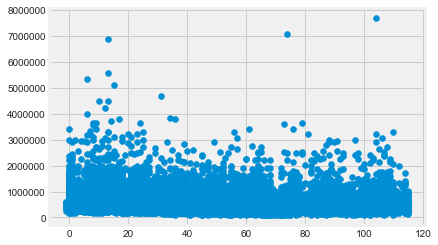

In [44]:
plt.scatter(df_housing['age_house'], df_housing['price']);

Columns 'age_house' has the correct int data types.<br>

In [45]:
df_housing['age_house'].dtype

dtype('int64')

In [46]:
df_housing.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age_house
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63


In [47]:
#date doesn't show up
df_housing.describe().round(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age_house
count,2.153400e+04,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000
mean,4.582351e+09,540057.664,3.373,2.116,2079.828,15090.596,1.494,0.007,0.234,3.410,7.657,1788.558,285.244,1971.002,68.867,98077.939,47.560,-122.214,1986.300,12751.080,2014.323,43.320
std,2.876779e+09,366059.581,0.926,0.769,917.447,41380.210,0.540,0.082,0.766,0.651,1.173,827.746,439.334,29.376,364.315,53.507,0.139,0.141,685.121,27255.483,0.467,29.378
min,1.000102e+06,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,2014.000,-1.000
25%,2.123212e+09,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,2014.000,18.000
50%,3.904945e+09,450000.000,3.000,2.250,1910.000,7617.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000,2014.000,40.000
75%,7.312175e+09,645000.000,4.000,2.500,2550.000,10687.750,2.000,0.000,0.000,4.000,8.000,2210.000,550.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,2015.000,63.000
max,9.900000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000,2015.000,115.000


### Target
The target variable is skewed.
The below boxplot showes that there are a lot of outliers.  When looking at the histogeram it's hard to get a real sense of how the data is distributed.<br>

I didn't create a new column for price but for visual purposes only I did create bins according to the statistical breakdown when applying method .describe(). The largest number of homes are in the price range of 440,000 to 640,000.  The main reason I didn't categeorize the target into bins because it would change the target from being a continuos to a categorical which would not be for a linear regression model. 

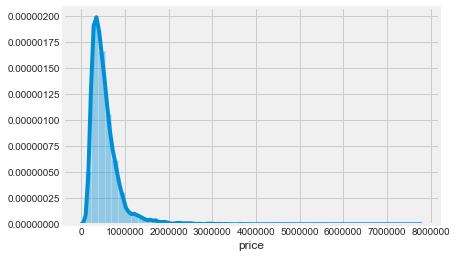

In [48]:
sns.distplot(df_housing['price']);

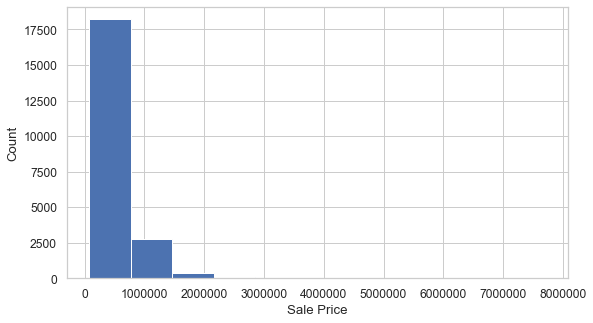

In [49]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df_housing['price'], norm_hist=False, kde=False, bins=11, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

The boxplot shows that there are a lot of outliers in the 'price'/target column.

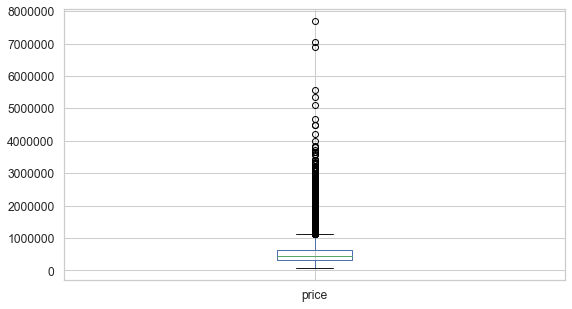

In [50]:
df_housing['price'].plot(kind='box');

The largest number of homes are in the price range of 440,000 to 640,000.

In [51]:
bins = [78000, 320000,440000,640000,700000]
bins_price = pd.cut(df_housing['price'], bins)
bins_price = bins_price.cat.as_ordered()
bins_price.head()

0     (78000, 320000]
1    (440000, 640000]
2     (78000, 320000]
3    (440000, 640000]
4    (440000, 640000]
Name: price, dtype: category
Categories (4, interval[int64]): [(78000, 320000] < (320000, 440000] < (440000, 640000] < (640000, 700000]]

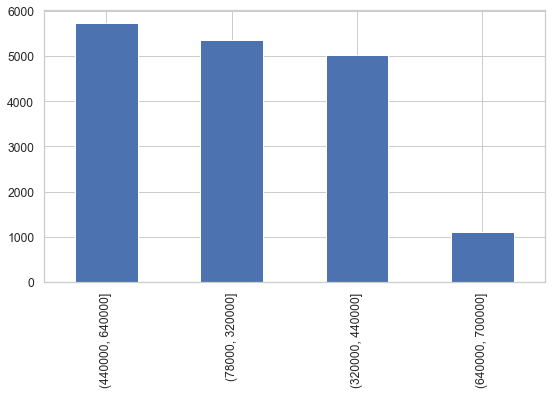

In [52]:
bins_price.value_counts().plot(kind='bar');

### Independent variables that are categorical
I didn't re-categorize the variables by binning and label encoding them, except for yr_renovated, because it would cause them to lose their meaning.<br>
The independent variables that would be considered categorical are numeric so we don't have to worry about converting them to numeric data types.<br>

In [53]:
df_housing[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade','yr_built',
            'yr_renovated','year','zipcode']].nunique()


bedrooms         12
bathrooms        29
floors            6
waterfront        2
view              5
condition         5
grade            11
yr_built        116
yr_renovated     70
year              2
zipcode          70
dtype: int64

In [54]:
df_housing['bedrooms'].value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

I considered grouping bathroom column in terms of whole numbers for easier analysis but then a lot would be lost becuase 
there is a difference between 1 bathroom and 1 bathroom and 1/2.  

In [55]:
df_housing['bathrooms'].value_counts()

2.50    5364
1.00    3841
1.75    3035
2.25    2037
2.00    1926
1.50    1441
2.75    1185
3.00     752
3.50     730
3.25     585
3.75     155
4.00     136
4.50     100
4.25      77
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       5
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [56]:
df_housing['floors'].value_counts()

1.0    10643
2.0     8211
1.5     1903
3.0      611
2.5      159
3.5        7
Name: floors, dtype: int64

In [57]:
df_housing['waterfront'].value_counts()

0.0    21389
1.0      145
Name: waterfront, dtype: int64

In [58]:
#view-has been viewed
df_housing['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [59]:
#condition - How good the condition is (Overall)
df_housing['condition'].value_counts()

3    13981
4     5657
5     1697
2      170
1       29
Name: condition, dtype: int64

In [60]:
print(df_housing['yr_renovated'].value_counts())
print('----------------')
print(df_housing['yr_renovated'].value_counts() *100/ len(df_housing['yr_renovated']))

0.0       20791
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64
----------------
0.0       96.549642
2014.0     0.338999
2003.0     0.143958
2013.0     0.143958
2007.0     0.139315
            ...    
1946.0     0.004644
1959.0     0.004644
1971.0     0.004644
1951.0     0.004644
1954.0     0.004644
Name: yr_renovated, Length: 70, dtype: float64


In [61]:
df_housing['zipcode'].value_counts()

98103    601
98038    586
98115    580
98052    573
98117    553
        ... 
98102    104
98010    100
98024     79
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [62]:
df_housing['condition'].value_counts()

3    13981
4     5657
5     1697
2      170
1       29
Name: condition, dtype: int64

In [63]:
df_housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'age_house'],
      dtype='object')

In [64]:
#pd.plotting.scatter_matrix(df_housing, figsize=(14,14));

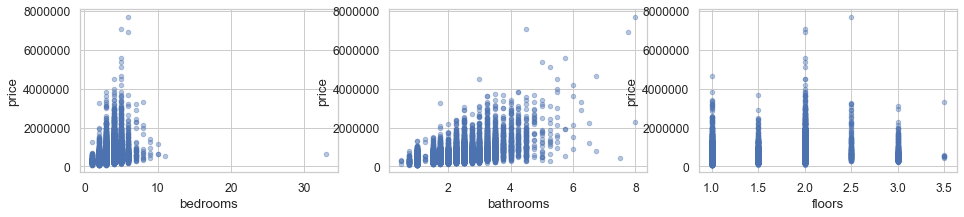

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,3))

for xcol, ax in zip(['bedrooms','bathrooms','floors'], axes):
    df_housing.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

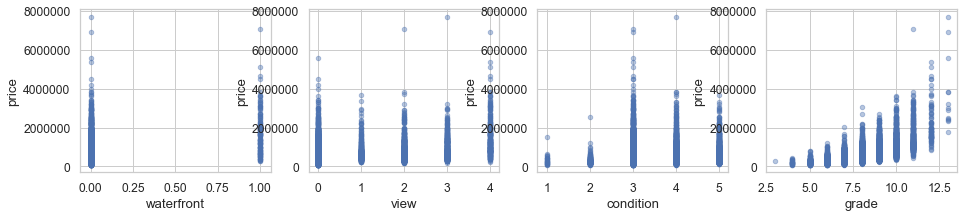

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14,3))

for xcol, ax in zip(['waterfront','view', 'condition', 'grade'], axes):
    df_housing.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

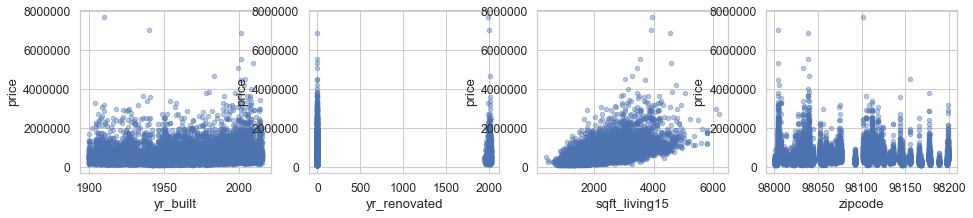

In [67]:
#'yr_built','yr_renovated'
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14,3))

for xcol, ax in zip(['yr_built','yr_renovated','sqft_living15','zipcode'], axes):
    df_housing.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

The columns 'yr_built'appears to be linear.  The column 'yr_renovated' wasn't categorcial but I label encoded so home was either renovated or not.  The marity of homes were not renovated.<br>
There doesn't seem to be a linear looking relationship between predcitor variables and target.<br>  
<br>
The following columns are already categorcial form: bedrooms, floors, waterfront, view, condition, grade, zipcode.<br>
A histogram of yr_built tells us how many home were built every ten years.  However,I thought it made better sense to create bins of year around quartiles which would also make it a categorical variable.<br>

#### Categorical variable 'yr_built'
A histogram of yr_built tells us how many home were built every ten years.  I thought it made better sense to create bins of year around quartiles which would also make it a categorical variable and easier to interpret visually.  However, it did not help my statsmodel, so I maintained it as it is.<br>

In [68]:
housingcols = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'age_house']

In [69]:
df_categories = df_housing[housingcols]

In [70]:
year_built_cat = df_categories['yr_built']

The average number of homes were built around 1971.
The largest number of homes were built from 1950 to 1974.
The least number of homes were built from 1900 to 1950.

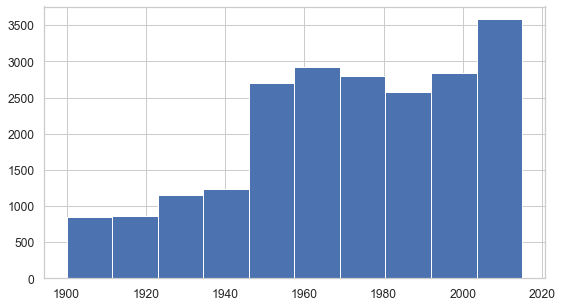

In [71]:
year_built_cat.hist();

In [72]:
bins=[1890,1950,1974,1996,2016]
bins_yr_built = pd.cut(year_built_cat, bins)
bins_yr_built = bins_yr_built.cat.as_ordered()
bins_yr_built.head()

0    (1950, 1974]
1    (1950, 1974]
2    (1890, 1950]
3    (1950, 1974]
4    (1974, 1996]
Name: yr_built, dtype: category
Categories (4, interval[int64]): [(1890, 1950] < (1950, 1974] < (1974, 1996] < (1996, 2016]]

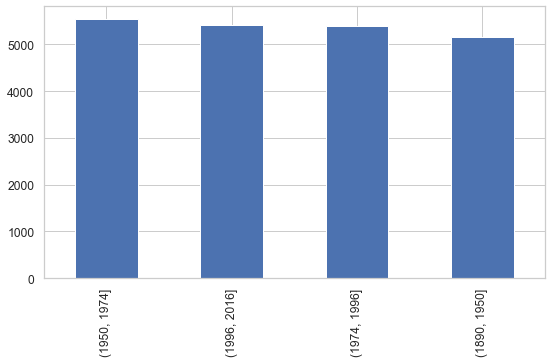

In [73]:
bins_yr_built.value_counts().plot(kind='bar');

In [74]:
year_built_cat= bins_yr_built
year_built_cat = year_built_cat.cat.codes
year_built_cat.value_counts()

1    5540
3    5422
2    5404
0    5168
dtype: int64

#### Categorical variable yr_renovated'
Column 'yr_renovated' is a problem b/c the majority of homes were not renovated, so it's easier to just group them in terms of properties that haven't been renovated (0) and those that have(1).

In [75]:
df_categories['yr_renovated'].describe()

count    21534.000000
mean        68.866722
std        364.314552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [76]:
df_categories['yr_renovated'].value_counts()

0.0       20791
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

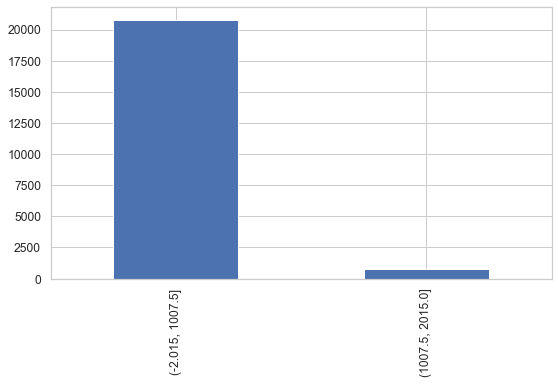

In [77]:
bins_yr_renovated = pd.cut(df_categories['yr_renovated'], 2)
bins_yr_renovated.value_counts().plot(kind='bar');

In [78]:
df_categories['yr_renovated']= bins_yr_renovated
df_categories['yr_renovated'] = abs(df_categories['yr_renovated'].cat.codes)

In [79]:
df_categories['yr_renovated']. value_counts()

0    20791
1      743
Name: yr_renovated, dtype: int64

In [80]:
df_categories['yr_renovated'].shape

(21534,)

In [81]:
df_categories.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age_house
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28


In [82]:
df_categories.shape

(21534, 23)

In [83]:
df_categories['yr_renovated'].isnull().sum()

0

### Collinearity

In [84]:
def multiplot(corr,figsize=(25,10)):
    fig, ax = plt.subplots(figsize=figsize)

    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True

    sns.heatmap(np.abs(corr),square=True, mask=mask,annot=True,cmap="Reds",ax=ax)
    return fig, ax


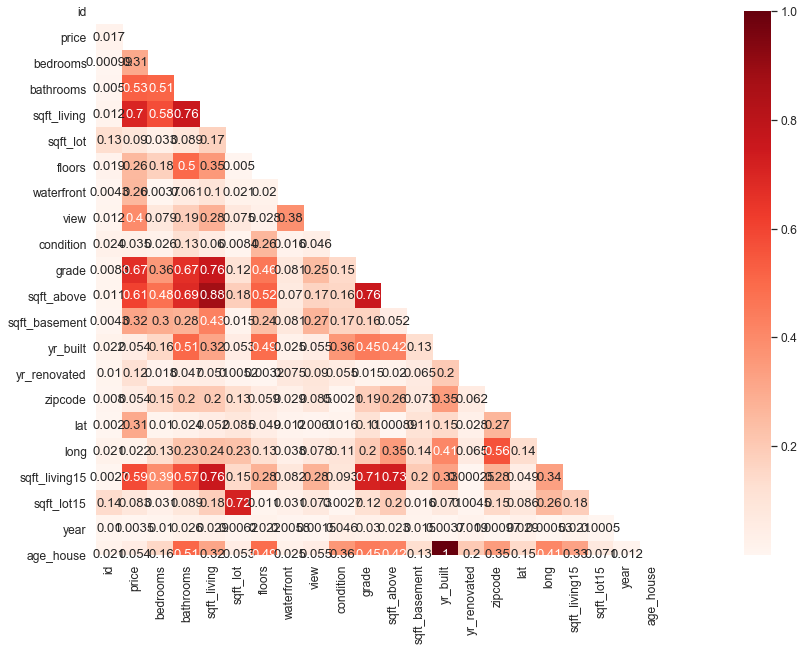

In [85]:
multiplot(np.abs(df_categories.corr()));

There was only a colinearity between sqft_above and sqft_living of 0.88.  I deleted sqft_living because it had a lower collinearity with price.<br>
Column 'sqft_above' had a collinearity of 0.76, but I left it in because it was close to 0.75.<br> 

In [86]:
df_housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'age_house'],
      dtype='object')

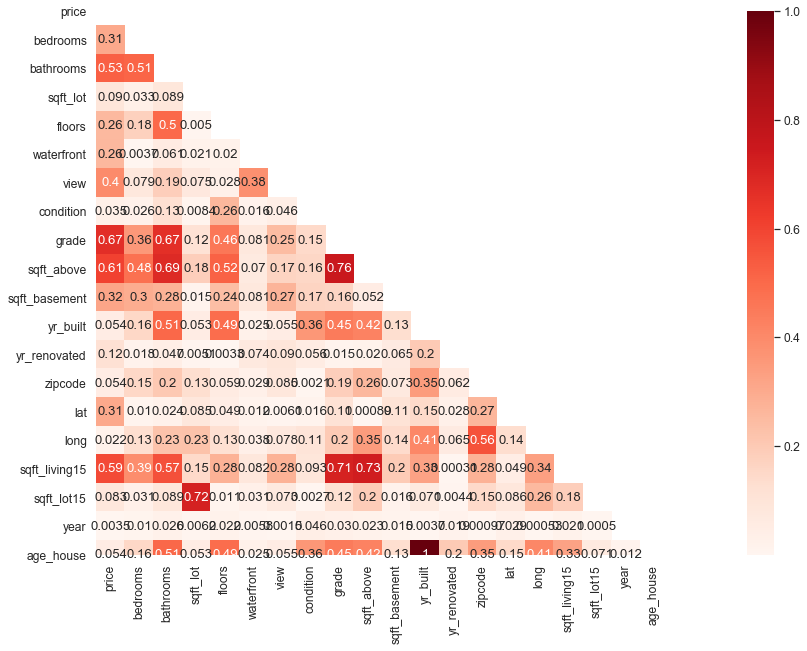

In [87]:
#--only sqft_living was deleted 11/13/19

collin_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 
              'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year','age_house']

collin_df = df_housing[collin_cols]
multiplot(np.abs(collin_df.corr()));

### Linearity

In [88]:
print(df_housing.shape)
print(collin_df.shape)

(21534, 23)
(21534, 20)


In [89]:
collin_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year', 'age_house'],
      dtype='object')

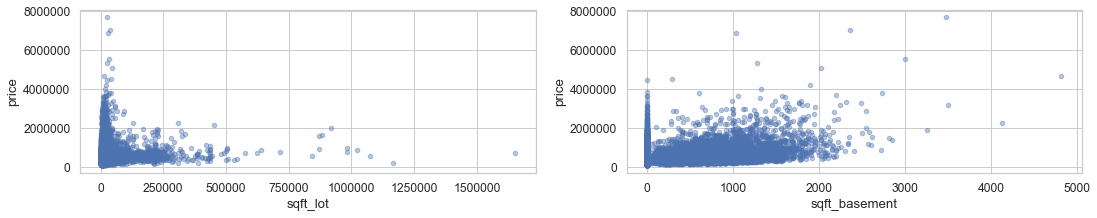

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['sqft_lot','sqft_basement'], axes):
    collin_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

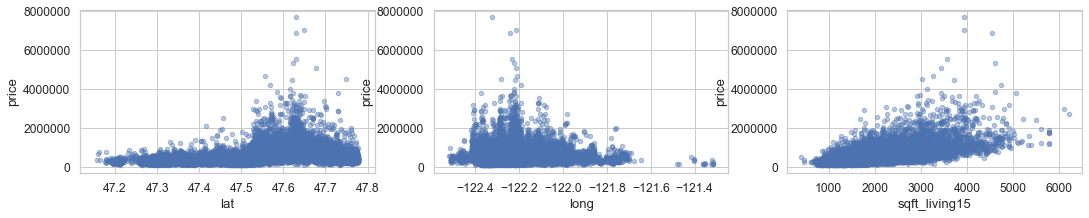

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['lat', 'long', 'sqft_living15'], axes):
    collin_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

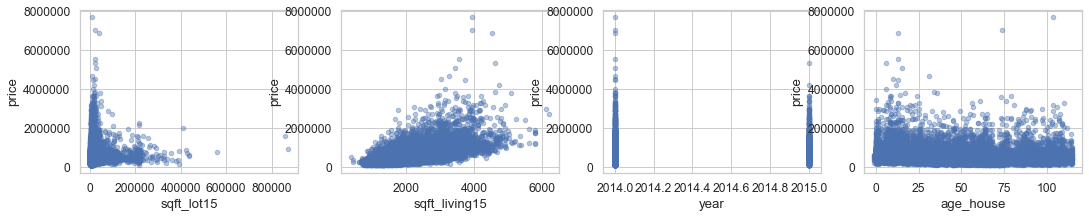

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_lot15', 'sqft_living15','year','age_house'], axes):
    collin_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

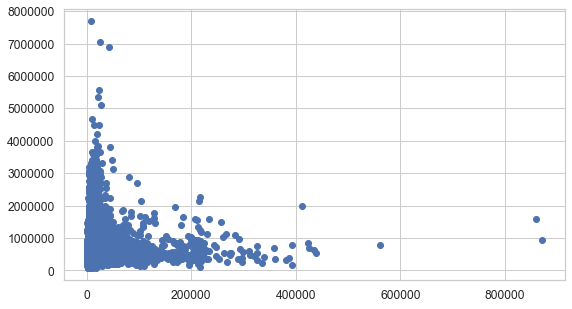

In [93]:
plt.scatter(collin_df['sqft_lot15'], collin_df['price']);

### Normalization
normalization-process of making data distribution more normally distributed.<br>
log gves you a more normal distribution.<br>
remove outliers, consider Z-score, IQR.<br>

In [94]:
#collin_df.columns
collin_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 
              'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year','age_house']
df_norm = collin_df[collin_cols]

Can't check if 'date' is normally distributed as a datetime datatype.<br>

In [95]:
df_norm.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year', 'age_house'],
      dtype='object')

In [96]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
year             21534 non-null int64
age_house        21534 non-null int64
dtypes: float64(9), int64(11)
memory usage: 3.5 MB


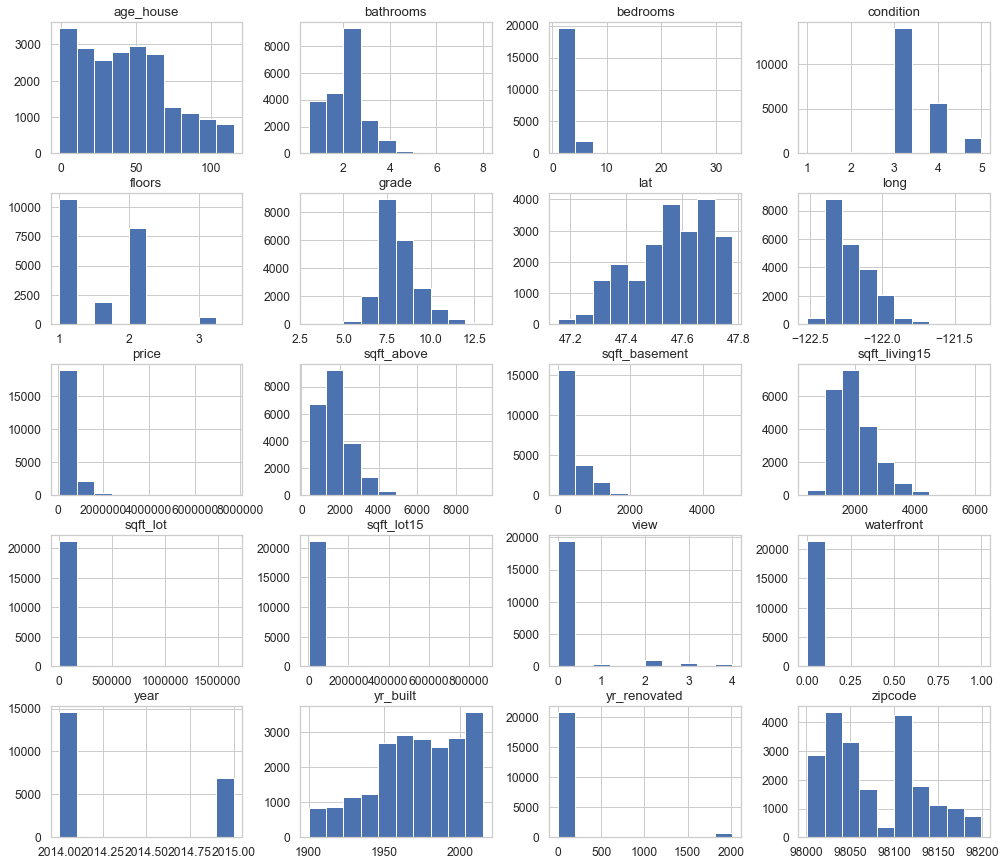

In [97]:
#df_norm.hist(figsize=(13,13));
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df_norm.hist(ax = ax);

In [98]:
df_norm.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year', 'age_house'],
      dtype='object')

The categorical variables are: bedrooms, bathrooms, floors, waterfront,view, condition, grade, zipcode.  The log normalization is not applied to categorical variables.<br>

In [99]:
df_norm.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year', 'age_house'],
      dtype='object')

The non-categorical variabls are skewed.  Howevered, I tried to normalize them with log but it didn't seem to help so I left them alone.  It appeared to help lat and sqft_living15 a little.  I couldn't apply log to long because all I got was a balnk screen.<br>

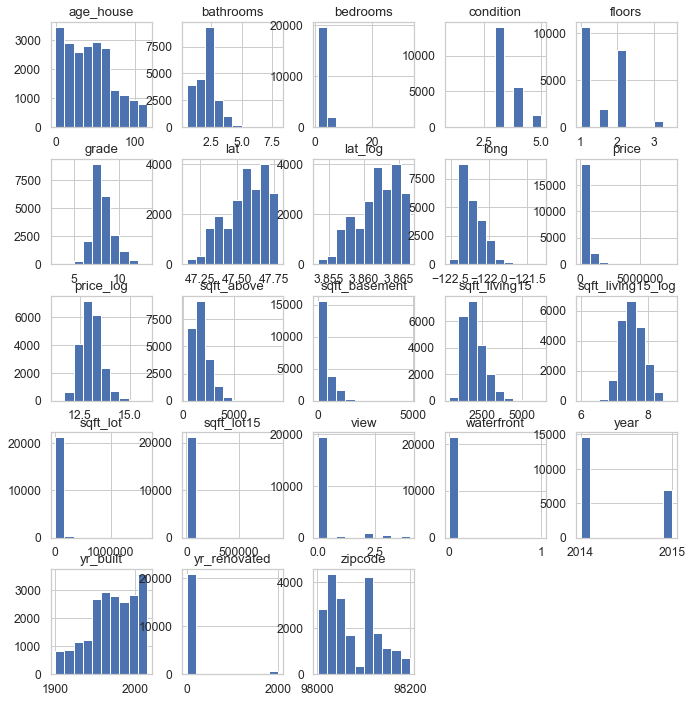

In [100]:
#transforming non-normal features
#let's try to make our data look more normal, and 
#second, let's perform feature scaling to manage the difference in magnitude!
#pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

log_cols =['lat','sqft_living15','price']
def normalize_log(df):
    for col in log_cols:
        #housing_df_1[col+'_log'] = np.log(housing_df_1[col])
        df[col+'_log'] = np.log(df[col])
    df.hist(figsize=(10,12));  
normalize_log(df_norm)        

### Standardization
not transforming categorical<br>
x' will have mean  𝜇=0  and  𝜎=1<br>

In [101]:
standard_cols = ['sqft_above', 'sqft_basement', 'yr_built', 'long', 'sqft_living15', 'sqft_lot15', 'lat_log','age_house','price_log']

df_standard = df_norm[standard_cols]

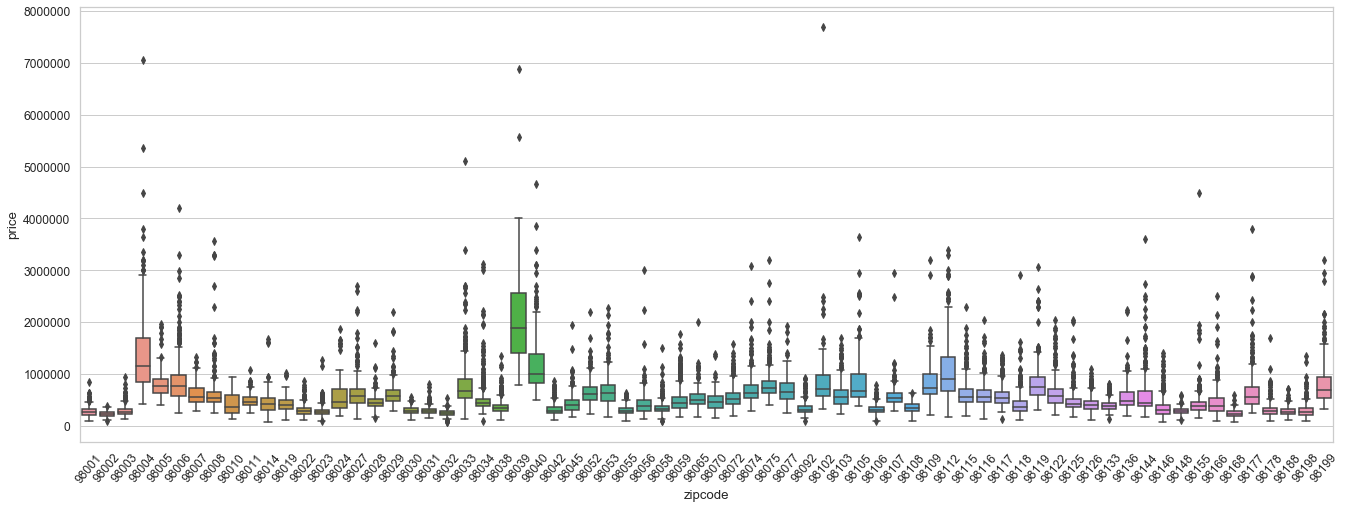

In [102]:
fig, axes = plt.subplots(ncols=1, nrows=1,figsize=(20,8))
sns.boxplot(x='zipcode',y='price',data=df_norm)
axes.set_xticklabels(axes.get_xticklabels(),rotation=50);

## Visualizations & EDA

In [103]:
#df_housing.columns
x_cols = ['price', 'bedrooms', 'bathrooms', 
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15','zipcode']
df_vis = df_norm[x_cols]

In [104]:
df_vis['price'].describe().round(3)

count      21534.000
mean      540057.664
std       366059.581
min        78000.000
25%       322000.000
50%       450000.000
75%       645000.000
max      7700000.000
Name: price, dtype: float64

In [105]:
df_vis['bedrooms'].value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [106]:
df_vis['bedrooms'].describe()

count    21534.000000
mean         3.373038
std          0.926410
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [107]:
six_or_more = df_vis[df_vis['bedrooms']>=6]
six_or_more['bedrooms'].describe()

count    332.000000
mean       6.379518
std        1.647282
min        6.000000
25%        6.000000
50%        6.000000
75%        6.000000
max       33.000000
Name: bedrooms, dtype: float64

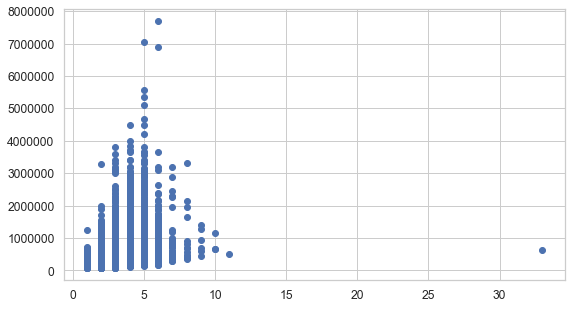

In [108]:
plt.scatter(df_vis['bedrooms'], df_vis['price']);

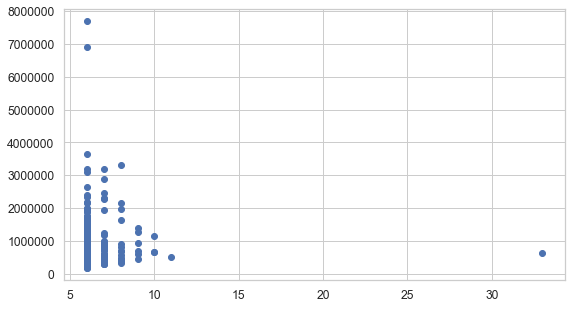

In [109]:
plt.scatter(six_or_more['bedrooms'], six_or_more['price']);

In [110]:
pivot = df_norm.pivot_table(index='yr_built', values='price', aggfunc=np.median)


### The sales price of homes in each condition.
The column condition refers to the overall condition of a home on a scale of 1 to 5 (5 being the best condition and 1 the lowest).  I thought that homes with a condition rating of 5 and more square foot living space would have the highest price values.  The below scatterplots show that homes with condition ratings of 1 and 2 have the smallest square foot living spaces and have low selling prices.  This makes sense because I would think that homes with low squarefoot living space and in poor condition wouldn't sell for much.<br>
<br>
What is surprsing is that homes with the mean square foot living space of around 3.4 and and a condition rating of 3 seem to have sold for the highest prices compared to conditions 4 and 5.  Whereas, homes around condition 5 with comparable square feet to condition 3 don't appear to have aa high sale prices as conditions 3 and 4.<br>

In [111]:
df_categories['condition'].value_counts()

3    13981
4     5657
5     1697
2      170
1       29
Name: condition, dtype: int64

In [112]:
df_categories['condition'].describe()

count    21534.000000
mean         3.409724
std          0.650654
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

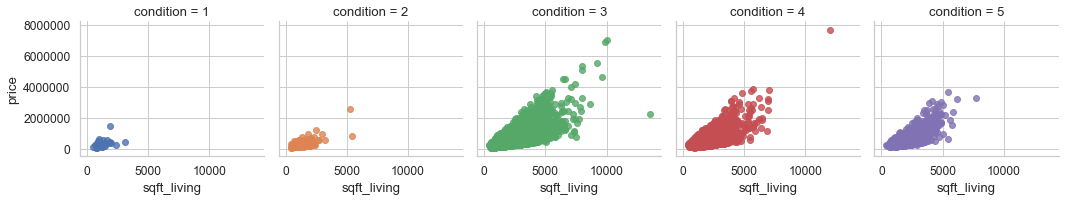

In [113]:
sns.lmplot(x='sqft_living', y='price', col='condition', hue='condition', fit_reg=False, data=df_categories, col_wrap=5, height=3)

In [114]:
df_categories['grade'].value_counts()

7     8948
8     6053
9     2604
6     2031
10    1130
11     397
5      242
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


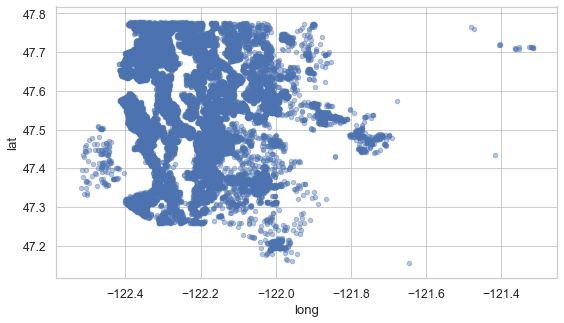

In [115]:
import matplotlib.pyplot as plt
df_vis.plot(kind="scatter", x="long", y="lat", alpha=0.4)
plt.show()


No handles with labels found to put in legend.


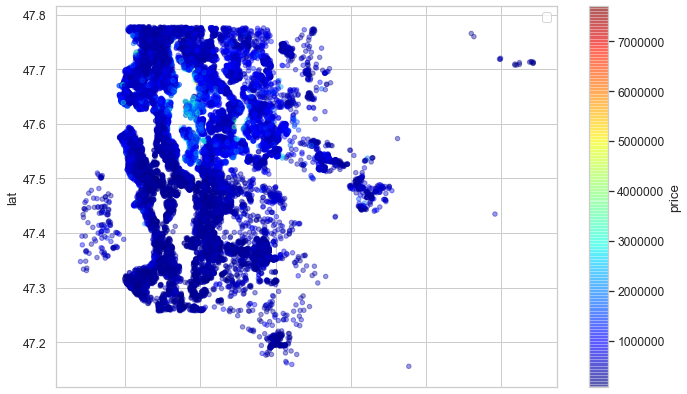

In [116]:
#from shapely.geometry import Point
#import geopandas as gpd
#from geopandas import GeoDataFrame
# c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
df_vis.plot(kind="scatter", x="long", y="lat",
    #s=df_vis['zipcode'], label="zipcode",
    c="price", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
#save_fig("housing_prices_scatterplot")
plt.show()

### Yr_Built
The below plot tells us what the year the house was built has on its later resale value.<br>
Th plot between price and yr_built tells us that homes buit in 2015 sold for the highest prices of around 650,000, which makes semse because it's new consruction.  What's also interesting is that homes that were built in 1905, 1927,1911 and 1902 also sold for prices around 600,000.  This is important information for real estate professiona; becuase it shows that there is definetly a strong market for new construction but the market is just as strong for older homes.<br>

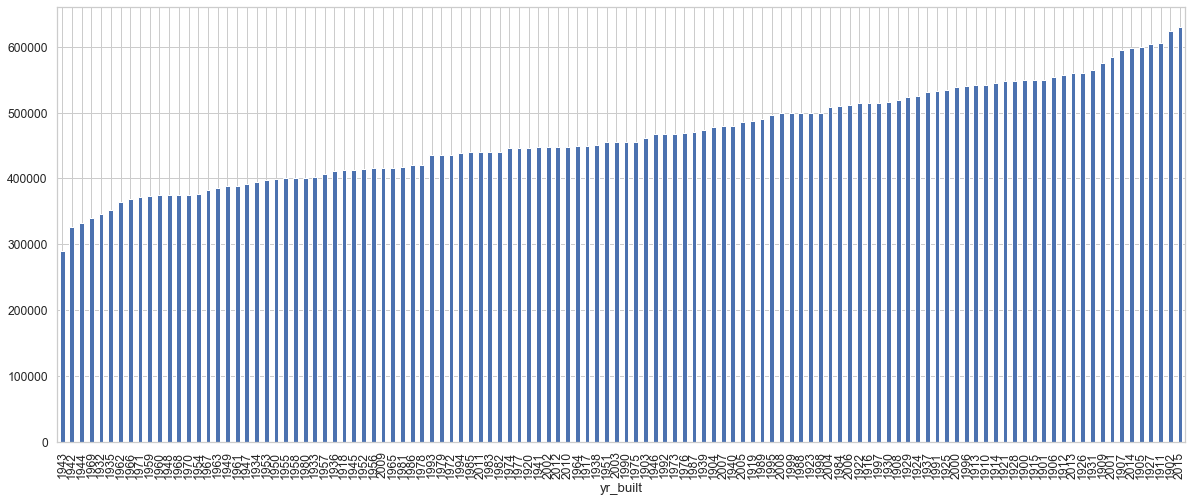

In [117]:
plt.figure(figsize=(18,8))
df_vis['price'].groupby(df_vis['yr_built']).median().sort_values().plot(kind='bar');

### Zipcode
Homes prices based on zipcode. The zip code with the highest home value is 98039.  The zipcode with the lowest home prices is 98002.<br>

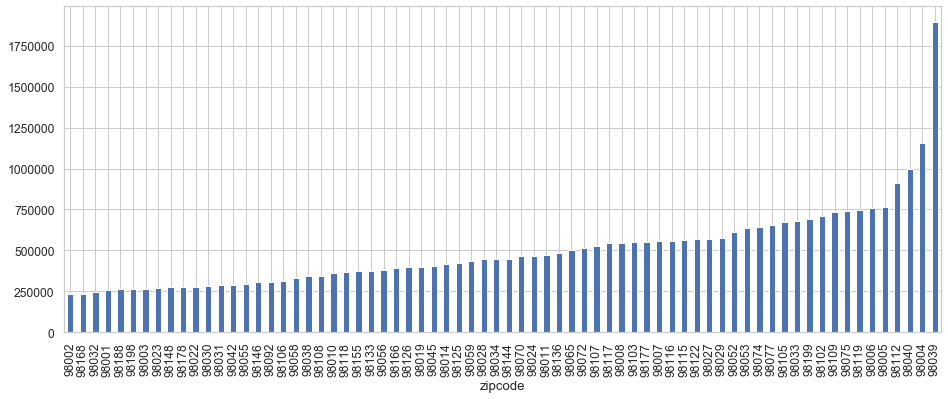

In [118]:
plt.figure(figsize=(14,6));
df_vis['price'].groupby(df_vis['zipcode']).median().sort_values().plot(kind='bar');

Top ten zipcodes with with largest number of reported homes. 

The column 'grade' is overall grade given to a housing unit based on 1-15 according to the King County grading system.<br>
There is a linear relationship between grade and price, meaning that as the grade of a property increases so does the price of a home.<br>
What is interesting is that a grade in the mide point of 6 and 7 out of 15 recevied a condition rating of 5. The below shows that a property with high condition rating doesn't mean that it will have an equally high 'grade'.  

## New Section

In [119]:
df_norm.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year', 'age_house', 'lat_log', 'sqft_living15_log', 'price_log'],
      dtype='object')

In [120]:
df_norm.columns
df_norm_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year', 'age_house', 'lat_log', 'sqft_living15_log','price_log']
df_sample = df_norm[df_norm_cols]
df_sample.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age_house,lat_log,sqft_living15_log,price_log
0,221900.0,3,1.00,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59,3.860965,7.200425,12.309982
1,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63,3.865372,7.432484,13.195614
2,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,82,3.865726,7.908387,12.100712
3,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49,3.861168,7.215240,13.311329
4,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28,3.863186,7.495542,13.142166


In [121]:
#categories: view
df_sample['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [122]:
df_sample['waterfront'].value_counts()

0.0    21389
1.0      145
Name: waterfront, dtype: int64

In [123]:
## What columns to treat as categories:
cat_cols= ['waterfront']
num_cols = df_sample.drop(['waterfront'],axis=1).columns
num_cols

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year', 'age_house', 'lat_log', 'sqft_living15_log', 'price_log'],
      dtype='object')

### Statmodel

In [124]:
df_sample_1 = df_norm[df_norm_cols]

In [125]:
df_sample_1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year', 'age_house', 'lat_log', 'sqft_living15_log', 'price_log'],
      dtype='object')

In [126]:
#features Gen_Label and Lgnd_Label now depict the numeric representations of our categorical features.
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# transform and map  waterfront status
waterfront_le = LabelEncoder()
waterfront_labels = waterfront_le.fit_transform(df_sample_1['waterfront'])
df_sample_1['water_label'] = waterfront_labels
water_df = df_sample_1['water_label']
water_df.iloc[4:10]

4     0
5     0
6     0
8     0
9     0
10    0
Name: water_label, dtype: int64

In [127]:
water_df.value_counts()

0    21389
1      145
Name: water_label, dtype: int64

In [128]:
water_dummies = pd.get_dummies(water_df, prefix='water', drop_first=True)

In [129]:
water_dummies.head()

,water_1
0,0
1,0
2,0
3,0
4,0


In [130]:
#remove orginal waterfront column
try:
    df_sample_1 = df_sample_1.drop(['waterfront', 'water_label'], axis=1)

except:
    print('waterfront, waterlabel in the dataframe.')   


In [131]:
df_sample_1 = pd.concat([df_sample_1,water_dummies], axis=1)
df_sample_1.head()

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age_house,lat_log,sqft_living15_log,price_log,water_1
0,221900.0,3,1.00,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59,3.860965,7.200425,12.309982,0
1,538000.0,3,2.25,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63,3.865372,7.432484,13.195614,0
2,180000.0,2,1.00,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,82,3.865726,7.908387,12.100712,0
3,604000.0,4,3.00,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49,3.861168,7.215240,13.311329,0
4,510000.0,3,2.00,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28,3.863186,7.495542,13.142166,0


In [132]:
## What columns to treat as categories:
cat_cols= ['water_1']
num_cols_1 = df_sample_1.drop(['water_1'],axis=1).columns
num_cols_1

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year', 'age_house', 'lat_log', 'sqft_living15_log', 'price_log'],
      dtype='object')

In [133]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data_1 = scaler.fit_transform(df_sample_1[num_cols_1])

In [134]:
df_sample_1.shape

(21534, 23)

In [135]:
type(scaled_data_1), scaled_data_1.shape

(numpy.ndarray, (21534, 22))

In [136]:
seattle_scaled_1 = pd.DataFrame(data=scaled_data_1,columns=num_cols_1)
seattle_scaled_1.describe().round(3)

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age_house,lat_log,sqft_living15_log,price_log
count,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000
mean,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.262,-2.562,-2.102,-0.352,-0.915,-0.305,-3.704,-3.972,-1.714,-0.649,-2.417,-0.189,-1.438,-2.918,-2.168,-2.317,-0.444,-0.690,-1.509,-2.927,-4.735,-3.389
25%,-0.596,-0.403,-0.476,-0.243,-0.915,-0.305,-0.630,-0.561,-0.723,-0.649,-0.681,-0.189,-0.840,-0.642,-0.810,-0.724,-0.281,-0.690,-0.862,-0.641,-0.711,-0.695
50%,-0.246,-0.403,0.175,-0.181,0.011,-0.305,-0.630,-0.561,-0.276,-0.649,0.136,-0.189,-0.242,0.085,-0.114,-0.214,-0.188,-0.690,-0.113,0.086,-0.067,-0.059
75%,0.287,0.677,0.500,-0.106,0.937,-0.305,0.907,0.292,0.509,0.603,0.885,-0.189,0.749,0.851,0.632,0.545,-0.098,1.449,0.670,0.851,0.693,0.625
max,19.560,31.981,7.656,39.543,3.716,4.919,2.444,4.556,9.208,10.322,1.498,5.342,2.263,1.570,6.388,6.165,31.497,1.449,2.440,1.566,3.648,5.337


In [137]:
df_filter_seattle_1 = pd.DataFrame()
for col in num_cols_1:
    abs_vals = np.abs(seattle_scaled_1[col])>3
    df_filter_seattle_1[col] = np.where(abs_vals==True,np.nan,seattle_scaled_1[col])#[housing_df_2['sqft_lot15']<3]
df_filter_seattle_1.head()

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age_house,lat_log,sqft_living15_log,price_log
0,-0.869162,-0.402680,-1.451646,-0.228148,-0.915398,-0.305436,-0.629726,-0.560649,-0.735216,-0.649280,-0.544752,-0.189035,1.870104,-0.353580,-0.305912,-0.943359,-0.260544,-0.690032,0.533735,-0.352053,-1.035003,-1.402367
1,-0.005621,-0.402680,0.174721,-0.189675,0.937163,-0.305436,-0.629726,-0.560649,0.460832,0.261210,-0.680920,NaN,0.879550,1.160948,-0.746467,-0.432488,-0.187566,-0.690032,0.669894,1.159617,-0.326314,0.280402
2,-0.983627,-1.482141,-1.451646,-0.123023,-0.915398,-0.305436,-0.629726,-1.413443,-1.230549,-0.649280,-1.293679,-0.189035,-0.933352,1.282948,-0.135375,1.070931,-0.172046,1.449207,1.316651,1.281098,1.127055,-1.799996
3,0.174681,0.676781,1.150541,-0.243856,-0.915398,-0.305436,2.444177,-0.560649,-0.892273,1.422084,-0.204330,-0.189035,1.085136,-0.284279,-1.272291,-0.914166,-0.284393,-0.690032,0.193337,-0.282737,-0.989759,0.500270
4,-0.082113,-0.402680,-0.150553,-0.169423,-0.915398,-0.305436,-0.629726,0.292146,-0.131151,-0.649280,0.544597,-0.189035,-0.073625,0.408737,1.200501,-0.271929,-0.192556,1.449207,-0.521500,0.409658,-0.133740,0.178847


In [138]:
try:
    df_filter_seattle_1.dropna(inplace=True)
except:
    print('NaN in the dataframe.')   

In [139]:
df_filter_seattle_1.isna().sum()

price                0
bedrooms             0
bathrooms            0
sqft_lot             0
floors               0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
year                 0
age_house            0
lat_log              0
sqft_living15_log    0
price_log            0
dtype: int64

In [140]:
df_filter_seattle_1.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age_house,lat_log,sqft_living15_log,price_log
count,18773.000000,18773.000000,18773.000000,18773.000000,18773.000000,18773.000000,18773.000000,18773.000000,18773.000000,18773.000000,18773.000000,1.877300e+04,18773.000000,18773.000000,18773.000000,18773.000000,18773.000000,18773.000000,18773.000000,18773.000000,18773.000000,18773.000000
mean,-0.157092,-0.050718,-0.097048,-0.126695,-0.021929,-0.183827,0.018769,-0.100931,-0.110832,-0.078034,0.020956,-1.890353e-01,0.009009,0.003218,-0.049262,-0.109713,-0.134649,0.005195,-0.020872,0.003183,-0.093490,-0.127083
std,0.635349,0.915525,0.895556,0.277288,1.000789,0.527760,0.995465,0.874563,0.856564,0.877459,0.989733,5.551263e-17,0.996163,1.011313,0.914164,0.873520,0.330401,1.001983,0.989798,1.011284,0.929737,0.872143
min,-1.211737,-2.561601,-2.102192,-0.352123,-0.915398,-0.305436,-2.166677,-2.266238,-1.713800,-0.649280,-2.417069,-1.890353e-01,-1.437974,-2.770474,-2.110767,-1.862926,-0.443961,-0.690032,-1.508655,-2.778266,-2.974728,-2.984530
25%,-0.620290,-0.402680,-0.801099,-0.243856,-0.915398,-0.305436,-0.629726,-0.560649,-0.747297,-0.649280,-0.646878,-1.890353e-01,-0.839903,-0.663272,-0.817525,-0.753607,-0.284393,-0.690032,-0.895938,-0.661982,-0.752232,-0.748785
50%,-0.293832,-0.402680,-0.150553,-0.187065,-0.915398,-0.305436,-0.629726,-0.560649,-0.336533,-0.649280,0.136091,-1.890353e-01,-0.241833,0.085330,-0.156692,-0.286525,-0.194867,-0.690032,-0.147062,0.086715,-0.150754,-0.134340
75%,0.163754,0.676781,0.499994,-0.125440,0.937163,-0.305436,0.907225,0.292146,0.376263,0.488832,0.885018,-1.890353e-01,0.748722,0.872192,0.568092,0.399501,-0.115615,1.449207,0.635854,0.871919,0.561265,0.487645
max,2.977569,2.835702,2.776907,2.951320,2.789724,2.306661,2.444177,2.850529,2.997902,2.992680,1.497776,-1.890353e-01,2.262588,1.569539,2.962721,2.997642,2.974660,1.449207,2.439965,1.566299,2.335223,2.386593


In [141]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [142]:
cols_1 = df_filter_seattle_1.drop(['price','price_log','yr_built','yr_renovated','sqft_living15'],axis=1).columns
str_cols_1 = ' + '.join(cols_1)
str_cols_1

'bedrooms + bathrooms + sqft_lot + floors + view + condition + grade + sqft_above + sqft_basement + zipcode + lat + long + sqft_lot15 + year + age_house + lat_log + sqft_living15_log'

In [143]:
formula_1 = 'price_log~'+str_cols_1
formula_1

'price_log~bedrooms + bathrooms + sqft_lot + floors + view + condition + grade + sqft_above + sqft_basement + zipcode + lat + long + sqft_lot15 + year + age_house + lat_log + sqft_living15_log'

In [144]:
model_seattle_1 = smf.ols(formula=formula_1, data=df_filter_seattle_1).fit()
model_seattle_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     3415.
Date:                Sat, 30 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:55:26   Log-Likelihood:                -10834.
No. Observations:               18773   AIC:                         2.170e+04
Df Residuals:                   18755   BIC:                         2.185e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0158      0.004     -4.313      0.000      -0.023      -0.009
bedrooms             -0.0297      0.004     -6.622      0.000      -0.038      -0.021
bathrooms             0.0997      0.006     16.202      0.000       0.088       0.112
sqft_lot              0.1022      0.020      5.146      0.000       0.063       0.141
floors                0.0634      0.005     13.596      0.000       0.054       0.072
view                  0.0997      0.006     16.127      0.000       0.088       0.112
condition             0.0810      0.004     22.752      0.000       0.074       0.088
grade                 0.3215      0.006     52.588      0.000       0.309       0.333
sqft_above            0.2514      0.008     31.918      0.000       0.236       0.267
sqft_basement         0.1263      0.005     25.179      0.000       0.116       0.136
zipcode              -0.1008      0.004    -23.809      0.000      -0.109      -0.093
lat                 -96.7404      2.231    -43.358      0.000    -101.114     -92.367
long                 -0.0723      0.005    -14.583      0.000      -0.082      -0.063
sqft_lot15           -0.0999      0.017     -5.906      0.000      -0.133      -0.067
year                  0.0436      0.003     13.826      0.000       0.037       0.050
age_house             0.1738      0.005     34.247      0.000       0.164       0.184
lat_log              97.1358      2.232     43.526      0.000      92.762     101.510
sqft_living15_log     0.1316      0.006     23.638      0.000       0.121       0.143
==============================================================================
Omnibus:                      341.221   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              712.356
Skew:                           0.009   Prob(JB):                    2.06e-155
Kurtosis:                       3.954   Cond. No.                     1.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

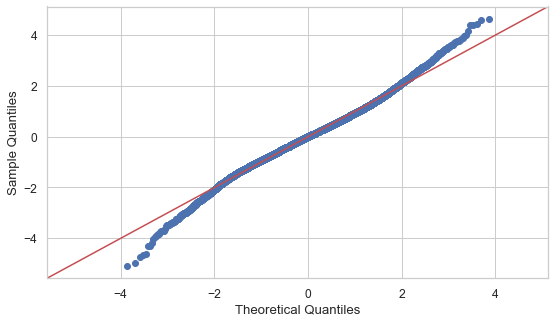

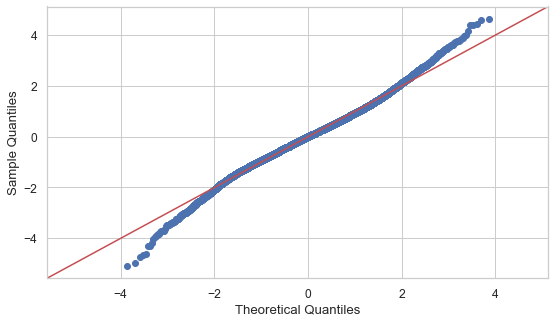

In [145]:
resids_1 = model_seattle_1.resid
import scipy.stats as stats

sm.graphics.qqplot(resids_1,stats.norm,line='45',fit=True)

### The target Variable is skewed.  

In [146]:
df_housing['price'].describe()

count    2.153400e+04
mean     5.400577e+05
std      3.660596e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

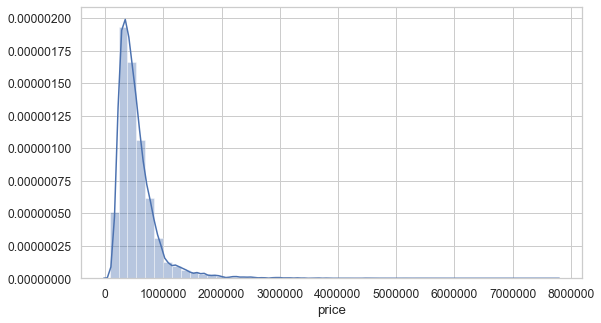

In [147]:
sns.distplot(df_housing['price']);

In [148]:
df_filter_seattle_1['price_log'].describe()

count    18773.000000
mean        -0.127083
std          0.872143
min         -2.984530
25%         -0.748785
50%         -0.134340
75%          0.487645
max          2.386593
Name: price_log, dtype: float64

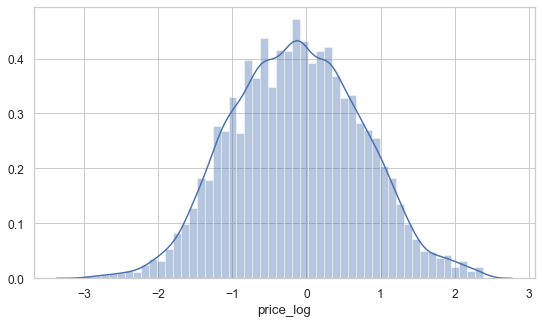

In [149]:
sns.distplot(df_filter_seattle_1['price_log']);

In [150]:
import folium
from folium.plugins import HeatMap

max_val = df_sample_1.price.max()

lat = np.array(df_sample_1.lat, dtype=pd.Series)
lon = np.array(df_sample_1.long, dtype=pd.Series)
mag = np.array(df_sample_1.price, dtype=pd.Series)

d = np.dstack((lat, lon, mag))[0]
heatmap_data = [i for i in d.tolist()]

m = folium.Map(location=[47.35, -121.9], zoom_start=9, detect_retina=True, control_scale=False)
HeatMap(heatmap_data, radius=1, blur=1).add_to(m);

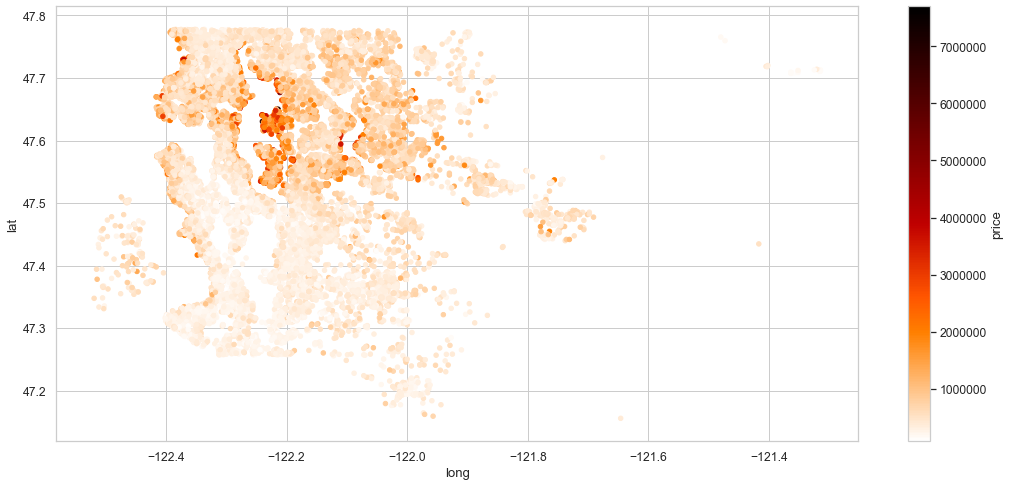

In [151]:
df_sample_1.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="price", 
             cmap="gist_heat_r", colorbar=True, sharex=False); #
plt.show();

In [152]:
df_filter_seattle_1[df_filter_seattle_1['price'] > 2.95]

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age_house,lat_log,sqft_living15_log,price_log
11789,2.950250,0.676781,1.475814,-0.168601,0.937163,-0.305436,-0.629726,1.997735,2.454244,-0.649280,1.157355,-0.189035,-1.381905,0.169791,0.141748,0.662234,-0.130475,-0.690032,-1.168256,0.171084,0.795296,2.374900
11824,2.950250,-0.402680,1.801087,-0.268023,0.937163,-0.305436,-0.629726,1.144940,0.944083,1.444847,1.293524,-0.189035,0.636583,0.565388,-0.476450,-0.155159,-0.321083,-0.690032,-1.304416,0.565975,-0.000940,2.374900
14172,2.977569,0.676781,1.475814,-0.277690,0.937163,-0.305436,-0.629726,1.144940,0.436669,1.239986,0.953102,-0.189035,0.636583,0.541565,-0.497767,1.450434,-0.291731,-0.690032,-0.964017,0.542208,1.405851,2.386593
16200,2.950250,0.676781,0.174721,0.063278,0.937163,-0.305436,0.907225,1.144940,0.678295,-0.649280,0.204175,-0.189035,-0.727765,0.454938,-0.156692,2.005094,0.260648,1.449207,-0.181102,0.455769,1.772375,2.374900
17254,2.977569,1.756242,0.499994,0.036066,0.937163,-0.305436,0.907225,1.144940,1.572310,-0.649280,-0.238372,-0.189035,-1.381905,0.618086,-0.028789,2.559753,0.187193,1.449207,0.261416,0.618545,2.099586,2.386593


### The impact of the number of bedrooms on the price of a home
A question I explored was the imact that the number of bedrooms has on the price of a home? A statistical analysis shows that the average number of bedrooms in the dataset is 3.37 bedrooms. When I checked the relationship between the number of bedrooms and price of homes it didn't show that the highest price for a home necessarily corresponded with the highest number of bedrooms which is around 8,9 and higher. The number of bedrooms range form 1 to 33, but the house with 33 bedrooms appears to be an outlier.

The scatter plot below shows that homes with 5 bedrooms had the highest price values. I thought that from a practical standpoint that more bedrooms would mean a higher price for a home. The scatter plot actually shows the opposite. After 5 bedrooms it shows that the price of the homes started to decrease pretty drastically. For example, it showed that homes with 6 bedrooms or more, the median price was around 150,000 which is far less than the median price for all houses which was around $540,000.
My analysis is made on broad assertions of working with just these 2 columns. I have not accounted for any data which would have an impact on things such as the overall condition of the home, ie, perhaps home with more bedrooms have not been renovated or maintained properly over the years.

In [153]:
df_sample_1['price'].describe().round(3)

count      21534.000
mean      540057.664
std       366059.581
min        78000.000
25%       322000.000
50%       450000.000
75%       645000.000
max      7700000.000
Name: price, dtype: float64

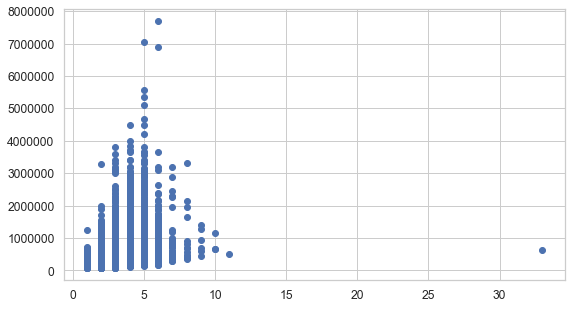

In [154]:
plt.scatter(df_sample_1['bedrooms'], df_vis['price']);

In [155]:
df_categories['bedrooms'].value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

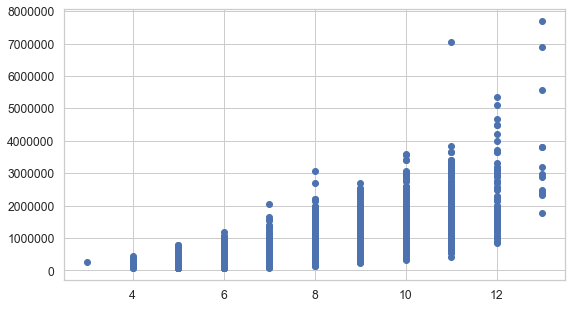

In [156]:
plt.scatter(df_categories['grade'], df_categories['price']);

In [157]:
df_filter_seattle_1.to_csv('final_statsmodel.csv')